In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,5

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
air_passenger=pd.read_csv('air_passengers.csv')
air_passenger.head()

,Month,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: >

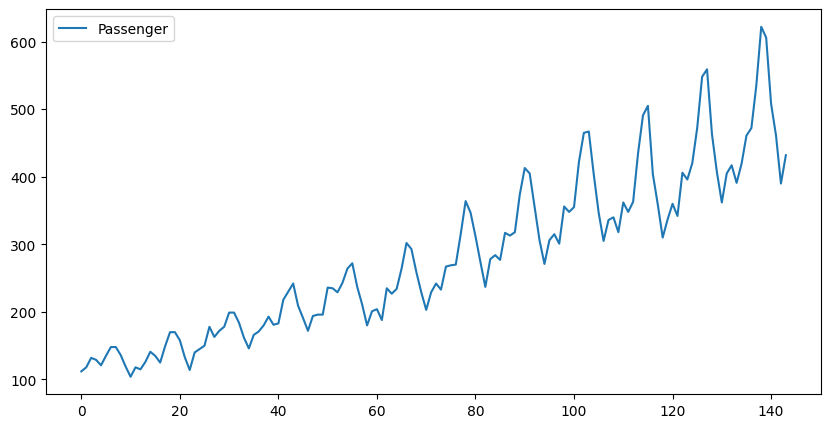

In [4]:

air_passenger.plot()

In [7]:

def test_timeseries_stationary(ts):
    ts=ts['Passenger']
    print('Dickey-Fuller Test')
    dickey_fuller_test=adfuller(ts,autolag='AIC')
    dickey_fuller_output=pd.Series(dickey_fuller_test[0:4],index=
                                  ['Test statistic','p-value','number of lags used',
                                  'observations used'])
    for key,value in dickey_fuller_test[4].items():
        dickey_fuller_output['Critical value (%s)'%key]=value
        print(dickey_fuller_output)


In [8]:
test_timeseries_stationary(air_passenger)

Dickey-Fuller Test
Test statistic           0.815369
p-value                  0.991880
number of lags used     13.000000
observations used      130.000000
Critical value (1%)     -3.481682
dtype: float64
Test statistic           0.815369
p-value                  0.991880
number of lags used     13.000000
observations used      130.000000
Critical value (1%)     -3.481682
Critical value (5%)     -2.884042
dtype: float64
Test statistic            0.815369
p-value                   0.991880
number of lags used      13.000000
observations used       130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [9]:
air_passenger_log=np.log(air_passenger['Passenger'])

In [10]:
air_passenger_log.head()

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
Name: Passenger, dtype: float64

<Axes: >

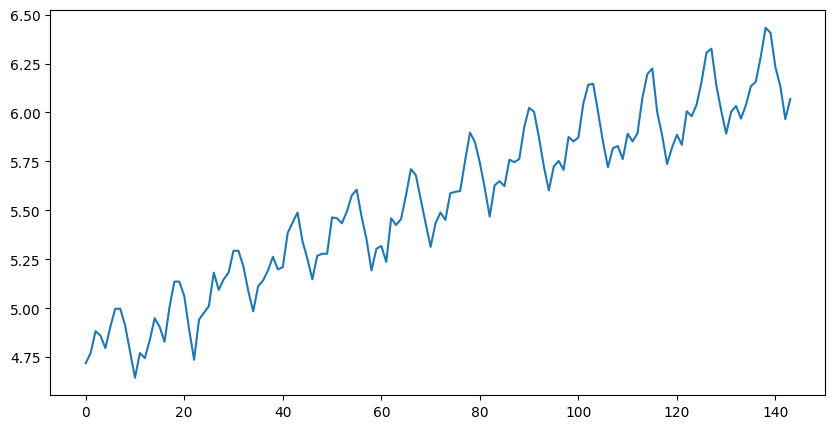

In [11]:
air_passenger_log.plot()

In [16]:
air_passenger_log=np.log(air_passenger['Passenger'])

In [17]:
air_passengers_log_value_diff = air_passenger_log - air_passenger_log.shift()

In [18]:
air_passengers_log_value_diff.head()

0         NaN
1    0.052186
2    0.112117
3   -0.022990
4   -0.064022
Name: Passenger, dtype: float64

In [21]:
air_passengers_log_value_diff.dropna(inplace=True)
test_timeseries_stationary(pd.DataFrame(air_passengers_log_value_diff))

Dickey-Fuller Test
Test statistic          -2.717131
p-value                  0.071121
number of lags used     14.000000
observations used      128.000000
Critical value (1%)     -3.482501
dtype: float64
Test statistic          -2.717131
p-value                  0.071121
number of lags used     14.000000
observations used      128.000000
Critical value (1%)     -3.482501
Critical value (5%)     -2.884398
dtype: float64
Test statistic           -2.717131
p-value                   0.071121
number of lags used      14.000000
observations used       128.000000
Critical value (1%)      -3.482501
Critical value (5%)      -2.884398
Critical value (10%)     -2.578960
dtype: float64


<Axes: >

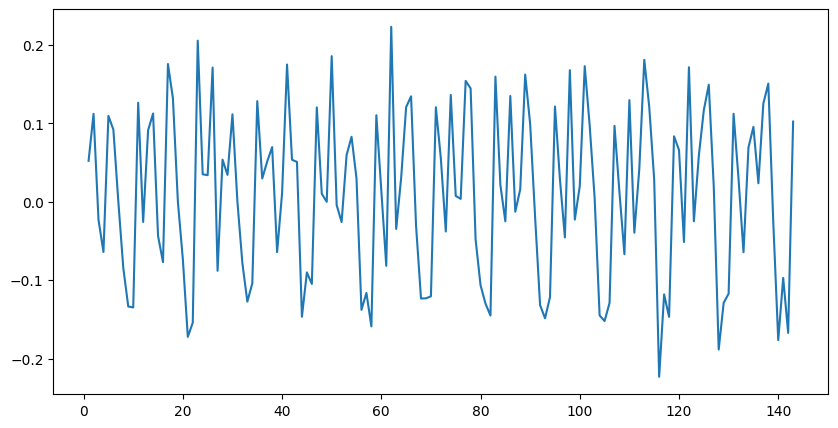

In [19]:
air_passengers_log_value_diff.plot()